In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content/drive/MyDrive/shoptalk-v1/data


In [ ]:
cd '/content/drive/MyDrive/shoptalk-v1/data/'


/content/drive/MyDrive/shoptalk-v1/data


In [ ]:
import tarfile
import json
import os
import pandas as pd
import gzip


In [ ]:
dataset= pd.read_csv('/content/drive/MyDrive/shoptalk-v1/data/dataset.csv')

dataset.head()

,Unnamed: 0,item_id,product_type,item_name_in_en_us,main_image_id,image_id,height,width,path
0,0,B07LCHFZCW,GROCERY,"Amazon Kitchen, Cajun Style Potato Salad, 7.2 oz",61bCuBtuZ4L,61bCuBtuZ4L,1000,974,87/87b38aee.jpg
1,1,B077W2YX72,GROCERY,"Wickedly Prime Peanut Butter-Filled Pretzels, ...",71QbaO8qZIL,71QbaO8qZIL,1114,600,3b/3b197757.jpg
2,2,B076HVVQ9T,GROCERY,"Wickedly Prime Peanut Butter-Filled Pretzels, ...",71QbaO8qZIL,71QbaO8qZIL,1114,600,3b/3b197757.jpg
3,3,B07C2BHFCN,HEALTH_PERSONAL_CARE,Amazon Brand - Mama Bear Organic Kids Multivit...,61oZajNgA-L,61oZajNgA-L,1000,540,55/5549b279.jpg
4,4,B07DBJQC1K,CHAIR,Amazon Brand – Ravenna Home Christian Upholste...,81CCMOsq9QL,81CCMOsq9QL,2560,2560,2e/2ea96af7.jpg


In [ ]:
dataset.columns

Index(['Unnamed: 0', 'item_id', 'product_type', 'item_name_in_en_us',
       'main_image_id', 'image_id', 'height', 'width', 'path'],
      dtype='object')

In [ ]:
!pwd

/content/drive/MyDrive/shoptalk-v1/data


In [ ]:
dataset = dataset.assign(img_full_path=f'/content/drive/MyDrive/shoptalk-v1/data/images/resize/' + dataset.path.astype(str))


In [ ]:
del dataset['Unnamed: 0']

In [ ]:
dataset.head()

,item_id,product_type,item_name_in_en_us,main_image_id,image_id,height,width,path,img_full_path
0,B07LCHFZCW,GROCERY,"Amazon Kitchen, Cajun Style Potato Salad, 7.2 oz",61bCuBtuZ4L,61bCuBtuZ4L,1000,974,87/87b38aee.jpg,/content/drive/MyDrive/shoptalk-v1/data/images...
1,B077W2YX72,GROCERY,"Wickedly Prime Peanut Butter-Filled Pretzels, ...",71QbaO8qZIL,71QbaO8qZIL,1114,600,3b/3b197757.jpg,/content/drive/MyDrive/shoptalk-v1/data/images...
2,B076HVVQ9T,GROCERY,"Wickedly Prime Peanut Butter-Filled Pretzels, ...",71QbaO8qZIL,71QbaO8qZIL,1114,600,3b/3b197757.jpg,/content/drive/MyDrive/shoptalk-v1/data/images...
3,B07C2BHFCN,HEALTH_PERSONAL_CARE,Amazon Brand - Mama Bear Organic Kids Multivit...,61oZajNgA-L,61oZajNgA-L,1000,540,55/5549b279.jpg,/content/drive/MyDrive/shoptalk-v1/data/images...
4,B07DBJQC1K,CHAIR,Amazon Brand – Ravenna Home Christian Upholste...,81CCMOsq9QL,81CCMOsq9QL,2560,2560,2e/2ea96af7.jpg,/content/drive/MyDrive/shoptalk-v1/data/images...


In [ ]:
!pip install qdrant-client[fastembed]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.3/229.3 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
del dataset['ID']
dataset

,item_id,product_type,item_name_in_en_us,main_image_id,image_id,height,width,path,img_full_path,sentences
0,B07LCHFZCW,GROCERY,"Amazon Kitchen, Cajun Style Potato Salad, 7.2 oz",61bCuBtuZ4L,61bCuBtuZ4L,1000,974,87/87b38aee.jpg,/content/drive/MyDrive/shoptalk-v1/data/images...,item_id b07lchfzcw. product_type grocery. item...
1,B077W2YX72,GROCERY,"Wickedly Prime Peanut Butter-Filled Pretzels, ...",71QbaO8qZIL,71QbaO8qZIL,1114,600,3b/3b197757.jpg,/content/drive/MyDrive/shoptalk-v1/data/images...,item_id b077w2yx72. product_type grocery. item...
2,B076HVVQ9T,GROCERY,"Wickedly Prime Peanut Butter-Filled Pretzels, ...",71QbaO8qZIL,71QbaO8qZIL,1114,600,3b/3b197757.jpg,/content/drive/MyDrive/shoptalk-v1/data/images...,item_id b076hvvq9t. product_type grocery. item...
3,B07C2BHFCN,HEALTH_PERSONAL_CARE,Amazon Brand - Mama Bear Organic Kids Multivit...,61oZajNgA-L,61oZajNgA-L,1000,540,55/5549b279.jpg,/content/drive/MyDrive/shoptalk-v1/data/images...,item_id b07c2bhfcn. product_type health_person...
4,B07DBJQC1K,CHAIR,Amazon Brand – Ravenna Home Christian Upholste...,81CCMOsq9QL,81CCMOsq9QL,2560,2560,2e/2ea96af7.jpg,/content/drive/MyDrive/shoptalk-v1/data/images...,item_id b07dbjqc1k. product_type chair. item_n...
...,...,...,...,...,...,...,...,...,...,...
26291,B00C6XB8OG,FINEEARRING,Sterling Silver Round Cubic Zirconia Stud Earr...,61o0+zooN1L,61o0+zooN1L,630,1620,09/09ebda92.jpg,/content/drive/MyDrive/shoptalk-v1/data/images...,NaN
26292,B07WR9JM45,GROCERY,Amazon Brand - Happy Belly Frozen Brussels Spr...,71GZaOvp4dL,71GZaOvp4dL,1836,1325,c1/c1d25879.jpg,/content/drive/MyDrive/shoptalk-v1/data/images...,NaN
26293,B07NSPKYWQ,DAIRY_BASED_DRINK,"365 by Whole Foods Market, Grade A Milk, Nonfa...",61kVyyp3RkL,61kVyyp3RkL,2560,1070,a0/a0449e7c.jpg,/content/drive/MyDrive/shoptalk-v1/data/images...,NaN
26294,B079NRQGSZ,FINENECKLACEBRACELETANKLET,Sterling Silver Double-Link Chain Bracelet,71JNmxxeXbL,71JNmxxeXbL,950,1500,a1/a1ba0053.jpg,/content/drive/MyDrive/shoptalk-v1/data/images...,NaN


In [ ]:
dataset.reset_index(inplace=True)
dataset.rename(columns={'index': 'ID'}, inplace=True)
dataset['ID'] += 0
#del dataset['ID']

In [ ]:
dataset

,ID,item_id,product_type,item_name_in_en_us,main_image_id,image_id,height,width,path,img_full_path,sentences
0,0,B07LCHFZCW,GROCERY,"Amazon Kitchen, Cajun Style Potato Salad, 7.2 oz",61bCuBtuZ4L,61bCuBtuZ4L,1000,974,87/87b38aee.jpg,/content/drive/MyDrive/shoptalk-v1/data/images...,item_id b07lchfzcw. product_type grocery. item...
1,1,B077W2YX72,GROCERY,"Wickedly Prime Peanut Butter-Filled Pretzels, ...",71QbaO8qZIL,71QbaO8qZIL,1114,600,3b/3b197757.jpg,/content/drive/MyDrive/shoptalk-v1/data/images...,item_id b077w2yx72. product_type grocery. item...
2,2,B076HVVQ9T,GROCERY,"Wickedly Prime Peanut Butter-Filled Pretzels, ...",71QbaO8qZIL,71QbaO8qZIL,1114,600,3b/3b197757.jpg,/content/drive/MyDrive/shoptalk-v1/data/images...,item_id b076hvvq9t. product_type grocery. item...
3,3,B07C2BHFCN,HEALTH_PERSONAL_CARE,Amazon Brand - Mama Bear Organic Kids Multivit...,61oZajNgA-L,61oZajNgA-L,1000,540,55/5549b279.jpg,/content/drive/MyDrive/shoptalk-v1/data/images...,item_id b07c2bhfcn. product_type health_person...
4,4,B07DBJQC1K,CHAIR,Amazon Brand – Ravenna Home Christian Upholste...,81CCMOsq9QL,81CCMOsq9QL,2560,2560,2e/2ea96af7.jpg,/content/drive/MyDrive/shoptalk-v1/data/images...,item_id b07dbjqc1k. product_type chair. item_n...
...,...,...,...,...,...,...,...,...,...,...,...
26291,26291,B00C6XB8OG,FINEEARRING,Sterling Silver Round Cubic Zirconia Stud Earr...,61o0+zooN1L,61o0+zooN1L,630,1620,09/09ebda92.jpg,/content/drive/MyDrive/shoptalk-v1/data/images...,NaN
26292,26292,B07WR9JM45,GROCERY,Amazon Brand - Happy Belly Frozen Brussels Spr...,71GZaOvp4dL,71GZaOvp4dL,1836,1325,c1/c1d25879.jpg,/content/drive/MyDrive/shoptalk-v1/data/images...,NaN
26293,26293,B07NSPKYWQ,DAIRY_BASED_DRINK,"365 by Whole Foods Market, Grade A Milk, Nonfa...",61kVyyp3RkL,61kVyyp3RkL,2560,1070,a0/a0449e7c.jpg,/content/drive/MyDrive/shoptalk-v1/data/images...,NaN
26294,26294,B079NRQGSZ,FINENECKLACEBRACELETANKLET,Sterling Silver Double-Link Chain Bracelet,71JNmxxeXbL,71JNmxxeXbL,950,1500,a1/a1ba0053.jpg,/content/drive/MyDrive/shoptalk-v1/data/images...,NaN


In [ ]:
def convert_to_sentences(row):
    sep = " __ "
    invalids = {"-", "N/A", "NA", "N\\A"}

    sents = []
    for k, v in row.items():
        if k == "ID": continue
        if k == "item_id": continue

        if type(v) == list:
            if len(v) == 0: continue
            sent = k + " " + " ".join(v)

        elif type(v) == dict:
            if len(v) == 0: continue
            # sent = sep.join([f"{k2} {v2}" for k2, v2 in v.items() if v2 not in invalids])
            for k2, v2 in v.items():
                if v2 not in invalids:
                    sents.append(f"{k2} {v2}")
            continue

        else:
            if pd.isna(v): continue
            sent = f"{k} {v}"

        sent = sent.lower()
        sent = [i for i in sent.split(". ") if len(i) > 0]
        sents.extend(sent)

    sents = ". ".join(sents)
    sents = sents.lower()

    return sents

convert_to_sentences(dataset.iloc[0])

'product_type grocery. item_name_in_en_us amazon kitchen, cajun style potato salad, 7.2 oz. main_image_id 61bcubtuz4l. image_id 61bcubtuz4l. height 1000. width 974. path 87/87b38aee.jpg. img_full_path /content/drive/mydrive/shoptalk-v1/data/images/resize/87/87b38aee.jpg. sentences id 0. item_id b07lchfzcw. product_type grocery. item_name_in_en_us amazon kitchen, cajun style potato salad, 7.2 oz. main_image_id 61bcubtuz4l. image_id 61bcubtuz4l. height 1000. width 974. path 87/87b38aee.jpg. img_full_path /content/drive/mydrive/shoptalk-v1/data/images/resize/87/87b38aee.jpg. sentences item_id b07lchfzcw. product_type grocery. item_name_in_en_us amazon kitchen, cajun style potato salad, 7.2 oz. main_image_id 61bcubtuz4l. image_id 61bcubtuz4l. height 1000. width 974. path 87/87b38aee.jpg. img_full_path /content/drive/mydrive/shoptalk-v1/data/images/resize/87/87b38aee.jpg'

NameError: name 'item_id' is not defined

In [ ]:
dataset['sentences'] = dataset.head(30).apply(convert_to_sentences, axis=1)
dataset.head(5)

,ID,item_id,product_type,item_name_in_en_us,main_image_id,image_id,height,width,path,img_full_path,sentences
0,0,B07LCHFZCW,GROCERY,"Amazon Kitchen, Cajun Style Potato Salad, 7.2 oz",61bCuBtuZ4L,61bCuBtuZ4L,1000,974,87/87b38aee.jpg,/content/drive/MyDrive/shoptalk-v1/data/images...,product_type grocery. item_name_in_en_us amazo...
1,1,B077W2YX72,GROCERY,"Wickedly Prime Peanut Butter-Filled Pretzels, ...",71QbaO8qZIL,71QbaO8qZIL,1114,600,3b/3b197757.jpg,/content/drive/MyDrive/shoptalk-v1/data/images...,product_type grocery. item_name_in_en_us wicke...
2,2,B076HVVQ9T,GROCERY,"Wickedly Prime Peanut Butter-Filled Pretzels, ...",71QbaO8qZIL,71QbaO8qZIL,1114,600,3b/3b197757.jpg,/content/drive/MyDrive/shoptalk-v1/data/images...,product_type grocery. item_name_in_en_us wicke...
3,3,B07C2BHFCN,HEALTH_PERSONAL_CARE,Amazon Brand - Mama Bear Organic Kids Multivit...,61oZajNgA-L,61oZajNgA-L,1000,540,55/5549b279.jpg,/content/drive/MyDrive/shoptalk-v1/data/images...,product_type health_personal_care. item_name_i...
4,4,B07DBJQC1K,CHAIR,Amazon Brand – Ravenna Home Christian Upholste...,81CCMOsq9QL,81CCMOsq9QL,2560,2560,2e/2ea96af7.jpg,/content/drive/MyDrive/shoptalk-v1/data/images...,product_type chair. item_name_in_en_us amazon ...


In [ ]:
ids = dataset.head(30)['ID'].index
documents = dataset.head(30)['sentences']
metadata = dataset.head(30)[[ 'item_id','item_name_in_en_us','product_type', 'img_full_path']].fillna("").to_dict(orient='records')

In [ ]:
QD_COLLECTION_NAME = "collection_name"


In [ ]:
from qdrant_client import QdrantClient

client = QdrantClient(":memory:")

client.add(
    collection_name=QD_COLLECTION_NAME,
    ids=ids,
    documents=documents,
    metadata=metadata,
)

print("Completed")

Completed


In [ ]:
#Importing the required modules
from PIL import Image
import requests
import torch
from torchvision import transforms
from torchvision.transforms.functional import InterpolationMode

#Setting the device based on hardware availability to mps or cuda otherwise set it to cpu for PyTorch operations
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#Transforming and loading the image
def load_demo_image(img_url):
    #img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg'
    raw_image = Image.open(img_url).convert('RGB')

    w,h = raw_image.size
    display(raw_image)

    transform = transforms.Compose([
        transforms.Resize((224,224),interpolation=InterpolationMode.BICUBIC),
        transforms.ToTensor(),
        transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))
        ])
    image = transform(raw_image).unsqueeze(0).to(device)
    return image

In [ ]:
 #This function displays the results understandable output

def display_results(results):
    for i, result in enumerate(results):
        print()
        print(f"{i+1})")
        for k, v in result.metadata.items():
            if k != "document":
                print(f"{k.capitalize()}: {v}")
            if k == "img_full_path":
                load_demo_image(v)


1)
Item_id: B077W2YX72
Item_name_in_en_us: Wickedly Prime Peanut Butter-Filled Pretzels, 44 Ounce
Product_type: GROCERY
Img_full_path: /content/drive/MyDrive/shoptalk-v1/data/images/resize/3b/3b197757.jpg


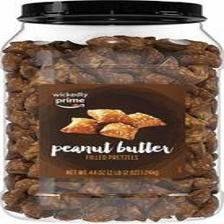


2)
Item_id: B076HVVQ9T
Item_name_in_en_us: Wickedly Prime Peanut Butter-Filled Pretzels, 44 oz
Product_type: GROCERY
Img_full_path: /content/drive/MyDrive/shoptalk-v1/data/images/resize/3b/3b197757.jpg


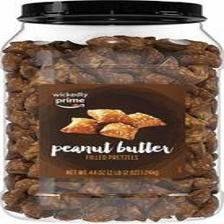


3)
Item_id: B074XXSSFL
Item_name_in_en_us: 365 Everyday Value, Dill Pickle Almonds, 12 oz
Product_type: GROCERY
Img_full_path: /content/drive/MyDrive/shoptalk-v1/data/images/resize/75/752a373e.jpg


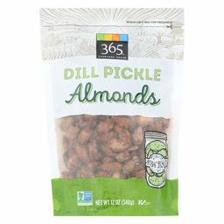

In [ ]:
results = client.query(
    collection_name=QD_COLLECTION_NAME,
    query_text="Pretzels",
    limit=3,

)
display_results(results)


1)
Item_id: B077W2YX72
Item_name_in_en_us: Wickedly Prime Peanut Butter-Filled Pretzels, 44 Ounce
Product_type: GROCERY
Img_full_path: /content/drive/MyDrive/shoptalk-v1/data/images/resize/3b/3b197757.jpg


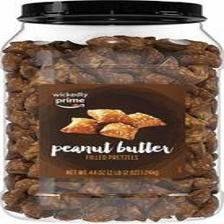


2)
Item_id: B076HVVQ9T
Item_name_in_en_us: Wickedly Prime Peanut Butter-Filled Pretzels, 44 oz
Product_type: GROCERY
Img_full_path: /content/drive/MyDrive/shoptalk-v1/data/images/resize/3b/3b197757.jpg


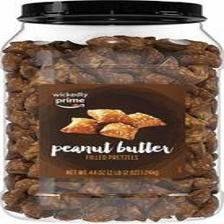


3)
Item_id: B07C2BHFCN
Item_name_in_en_us: Amazon Brand - Mama Bear Organic Kids Multivitamin, 60 Gummies, 1 Month Supply
Product_type: HEALTH_PERSONAL_CARE
Img_full_path: /content/drive/MyDrive/shoptalk-v1/data/images/resize/55/5549b279.jpg


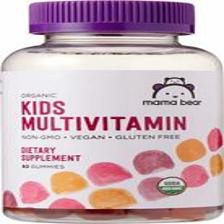

In [ ]:
from qdrant_client.http.models import Filter, FieldCondition, MatchValue

# searching with a condition: products only belonging to vendor "MEGA.PK"
results = client.query(
    collection_name=QD_COLLECTION_NAME,
    query_text="peanut butter",

    limit=3
)

display_results(results)

In [ ]:
#Importing the required modules
from PIL import Image
import requests
import torch
from torchvision import transforms
from torchvision.transforms.functional import InterpolationMode

#Setting the device based on hardware availability to mps or cuda otherwise set it to cpu for PyTorch operations
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#Transforming and loading the image
def load_demo_image(img_url):
    #img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg'
    raw_image = Image.open(img_url).convert('RGB')

    w,h = raw_image.size
    #display(raw_image.resize((w//5,h//5)))

    transform = transforms.Compose([
        transforms.Resize((224,224),interpolation=InterpolationMode.BICUBIC),
        transforms.ToTensor(),
        transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))
        ])
    image = transform(raw_image).unsqueeze(0).to(device)
    return image

In [ ]:
!pip install faiss-gpu


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 8.4 MB/s eta 0:00:00


In [ ]:
import torch
from torchvision import transforms
from PIL import Image
from transformers import BertTokenizer
from models.blip import blip_feature_extractor  # Adjust the import according to your setup

# Setting up the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the pre-trained BLIP model
model = blip_feature_extractor(pretrained=True, image_size=224, vit='base').to(device)
if is_eval:
    model.eval()

# Visual preprocessor
vis_processors = {
    'eval': transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
}

# Text preprocessor setup
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
txt_processors = lambda text: tokenizer(text, return_tensors="pt")

# Example usage: Preprocess image and text
image_path = "path_to_your_image.jpg"
caption = "Example caption text."

# Preprocessing image
image = Image.open(image_path).convert('RGB')
processed_image = vis_processors['eval'](image).unsqueeze(0).to(device)

# Preprocessing text
processed_text = txt_processors(caption).to(device)

# Assuming the model can process this structure
with torch.no_grad():
    output = model(image=processed_image, text=processed_text['input_ids'], attention_mask=processed_text['attention_mask'])


AttributeError: 'bool' object has no attribute 'decode'

In [ ]:
import torch
from torchvision import transforms
from PIL import Image
from models.blip import blip_feature_extractor
from models.blip_itm import blip_itm
import numpy as np
import faiss
from transformers import AutoTokenizer

images_embedding = None
texts_embedding = None
multimodal_embedding = None

# Assuming the dataset is loaded as a pandas DataFrame `df`
# We consider 'image_path', 'product_name', and 'product_type' as columns

# Select only the first 30 rows for training
df_subset = dataset.iloc[:30]
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Define a transform for the images
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the pre-trained model and configure for evaluation
image_size = 224
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base.pth'
model = blip_feature_extractor(pretrained=model_url, image_size=image_size, vit='base')
model.eval()
model.to(device)

# Collect all features in a list (now using tensors)
# Initialize lists to store embeddings
multimodal_embeddings = []
text_embeddings = []

# Extract features for each image and its corresponding caption
for index, row in df_subset.iterrows():
    print(f"Processing image {index+1} of {len(df_subset['img_full_path'])}")
    image = load_demo_image(row['img_full_path'])
    caption = f"{row['item_name_in_en_us']} {row['product_type']}"

    # Image + Caption features for multimodal context
    multimodal_feature = model(image, caption, mode='multimodal')[0,0]
    multimodal_embeddings.append(multimodal_feature.cpu().detach().numpy())

    # Text-only features
    #text_feature = model(None, caption, mode='text')[0,0]  # Adjust here to pass None for image
    text = tokenizer(caption, return_tensors="pt").to(device)
    with torch.no_grad():
        text_feature = model(**text).last_hidden_state[:,0,:]
    text_embeddings.append(text_feature.cpu().detach().numpy())

# Normalize and prepare FAISS index for text embeddings
text_embeddings_np = np.array(text_embeddings)
faiss.normalize_L2(text_embeddings_np)
text_index = faiss.IndexFlatIP(text_embeddings_np.shape[1])
text_index.add(text_embeddings_np)

# Normalize and prepare FAISS index for multimodal embeddings
multimodal_embeddings_np = np.array(multimodal_embeddings)
faiss.normalize_L2(multimodal_embeddings_np)
multimodal_index = faiss.IndexFlatIP(multimodal_embeddings_np.shape[1])
multimodal_index.add(multimodal_embeddings_np)

def search_product(query, index_type='text'):
    # Convert the query into a feature vector
    query_tensor = model(None, query, mode='text')[0,0].unsqueeze(0).cpu().detach().numpy()
    faiss.normalize_L2(query_tensor)  # Normalize the query vector

    # Choose the index based on the type specified
    if index_type == 'multimodal':
        index = multimodal_index
    else:
        index = text_index

    # Perform the search using the chosen index
    D, I = index.search(query_tensor, 3)  # Search for top 3 closest vectors

    # Fetch and display the results
    results = df_subset.iloc[I[0]]
    for idx, result in results.iterrows():
        print(f"Match: {result['item_name_in_en_us']}, Type: {result['product_type']}, Score: {D[0][idx]}")

# Example user input
# User input example
user_query = "Multivitamin for kids"  # Change this string to test with different queries
search_product(user_query)


load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base.pth
Processing image 1 of 30


TypeError: BLIP_Base.forward() got an unexpected keyword argument 'input_ids'

In [ ]:
def search_similar_product(image_target, text_target, number_retrieval, search_modality, len_dataset = 68, is_coco_finetuned = False):
    '''
    search_modality: (II for image vs image -
                      TI for text vs image -
                      MI for multimodal vs image -
                      IT for image vs text -
                      TT for text vs text -
                      MT for multimodal vs text -
                      IM for image vs multimodal -
                      TM for text vs multimodal -
                      MM for multimodal vs multimodal).
    The first argument refers to the target product the second for the database product
    '''
    #create an empty dict to save the find products
    retrieval_map = {}

    # preprocess image. check if the image is None
    if image_target is None:
        if is_coco_finetuned:
            image_processed = torch.rand(1, 3, 364, 364).to(device)
        else:
            image_processed = torch.rand(1, 3, 224, 224).to(device)


    # preprocess text
    text_translated = translate_caption(text_target)
    text_input = txt_processors["eval"](text_translated)

    # build sample
    sample = {"image": image_processed, "text_input": [text_input]}

    # find features of image and text target
    multimodal_emb = model.extract_features(sample).multimodal_embeds[0,0,:] # size (768)
    image_emb = model.extract_features(sample, mode="image").image_embeds[0,0,:] # size (768)
    text_emb = model.extract_features(sample, mode="text").text_embeds[0,0,:] # size (768)

    # normalize
    image_emb /= image_emb.norm(dim=-1, keepdim=True)
    text_emb /= text_emb.norm(dim=-1, keepdim=True)
    multimodal_emb /= multimodal_emb.norm(dim=-1, keepdim=True)

    # transform to numpy tensor
    image_emb = image_emb.cpu().detach().numpy()
    text_emb = text_emb.cpu().detach().numpy()
    multimodal_emb = multimodal_emb.cpu().detach().numpy()

    # calculate the similarity product depending on the type of search
    if search_modality == "II":
      similarity_vector = images_embedding.cpu().detach().numpy() @ image_emb.T
    elif search_modality == "TI":
      similarity_vector = images_embedding.cpu().detach().numpy() @ text_emb.T
    elif search_modality == "MI":
      similarity_vector = images_embedding.cpu().detach().numpy() @ multimodal_emb.T

    elif search_modality == "IT":
      similarity_vector = texts_embedding.cpu().detach().numpy() @ image_emb.T
    elif search_modality == "TT":
      similarity_vector = texts_embedding.cpu().detach().numpy() @ text_emb.T
    elif search_modality == "MT":
      similarity_vector = texts_embedding.cpu().detach().numpy() @ multimodal_emb.T

    elif search_modality == "IM":
      similarity_vector = multimodal_embedding.cpu().detach().numpy() @ image_emb.T
    elif search_modality == "TM":
      similarity_vector = multimodal_embedding.cpu().detach().numpy() @ text_emb.T
    elif search_modality == "MM":
      similarity_vector = multimodal_embedding.cpu().detach().numpy() @ multimodal_emb.T

    # sort the extracted product from the higest to lowest similarity
    index_sorted = np.argsort(similarity_vector)

    for i in range(1, number_retrieval+1):

        print("Extracted: ", i)

        # index of the db product
        idx = index_sorted[len_dataset-i]
        similarity_value = similarity_vector[idx]

        print("idx: ", idx)
        print("similarity value: ", similarity_value)

        # extract name of the image
        name_image_found = names_image[idx]
        print("name_image_found: ", name_image_found)
        print("-----------------------")

        # extract text of the image
        text_image_found = original_texts[idx]
        translated_text_image_found = texts[idx]

        # extract image
        image_found = images[idx]

        #fill the extracted infos in the map
        retrieval_map[i] = (image_found, name_image_found, text_image_found, translated_text_image_found, similarity_value)

    return retrieval_map

AttributeError: 'NoneType' object has no attribute 'device'